> ## Formulación del problema.

#### Un dataset de información de la tarjeta de credito de los clientes puede ser usada para identificar clientes leales, segmentación de clientes, marketing dirigido y otros casos similares en la industria del marketing.

#### Realizar algunas tareas:

* #### Realizar limpieza de datos, preprocesado y visualización del dataset.
* #### Implementar modelo de clustering jerárquico y modelo de k-means.

> ## Recolección de datos.
Link dataset: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv


In [2]:
data = pd.read_csv("/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


> ## Exploración de datos.

In [4]:
data.shape

(660, 7)

In [5]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
data.columns.values

array(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype=object)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### Descripción del dataset.
* #### Contiene 660 filas y 7 columnas.
* #### Todas las columnas son númericas.
* #### No tiene valores nulos ni filas duplicadas.
* #### Se eliminará del dataset a la columna Sl_No que representa la enumeración de los clientes.
* #### Lo que si se duplica son algunas claves de clientes. A estas duplicadas las eliminamos del dataset. 

In [11]:
data.drop(["Sl_No"], axis=1, inplace=True)

In [12]:
data[data["Customer Key"].duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


In [13]:
data = data[~data["Customer Key"].duplicated()]

### Análisis de variables.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
var = data.columns.tolist()
var

['Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [16]:
for col in var:
    print(col)
    print(data[col].describe())
    print()

Customer Key
count      655.000000
mean     55058.158779
std      25606.965469
min      11265.000000
25%      33623.500000
50%      53898.000000
75%      77084.500000
max      99843.000000
Name: Customer Key, dtype: float64

Avg_Credit_Limit
count       655.000000
mean      34242.748092
std       37240.896986
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

Total_Credit_Cards
count    655.000000
mean       4.691603
std        2.169325
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

Total_visits_bank
count    655.000000
mean       2.401527
std        1.633648
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Total_visits_bank, dtype: float64

Total_visits_online
count    655.000000
mean       2.606107
std        2.940380
min        0.0

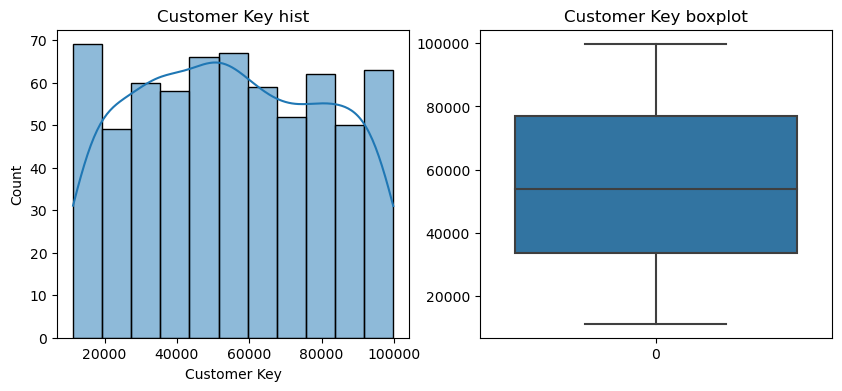

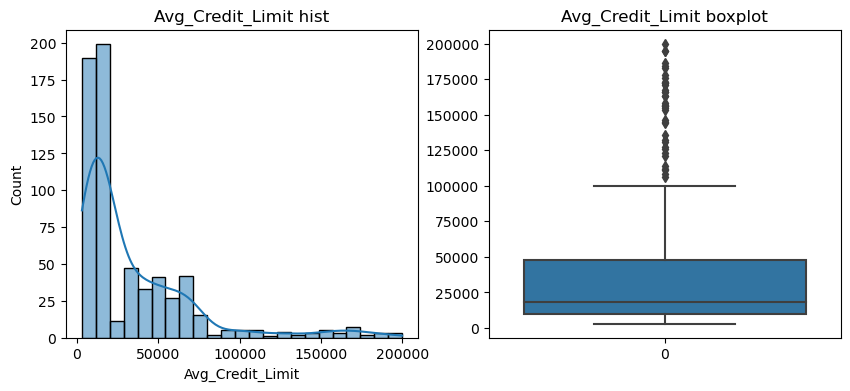

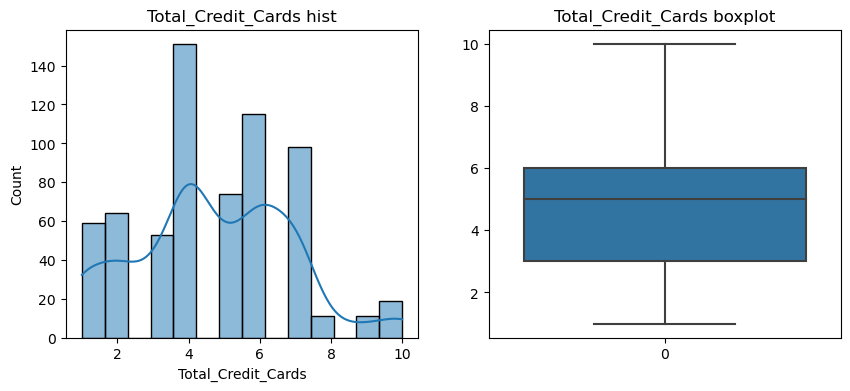

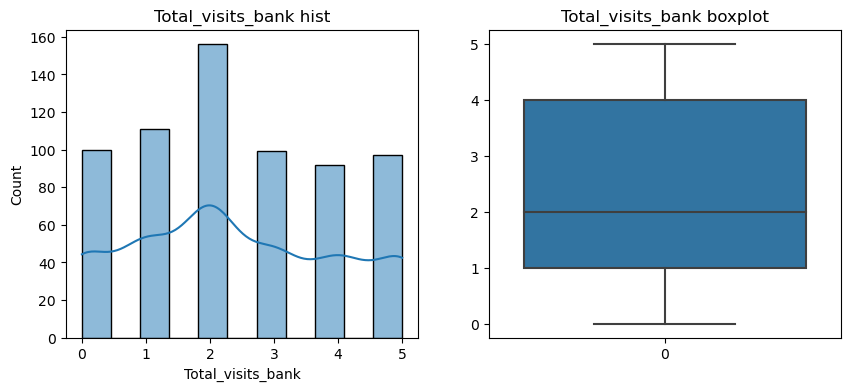

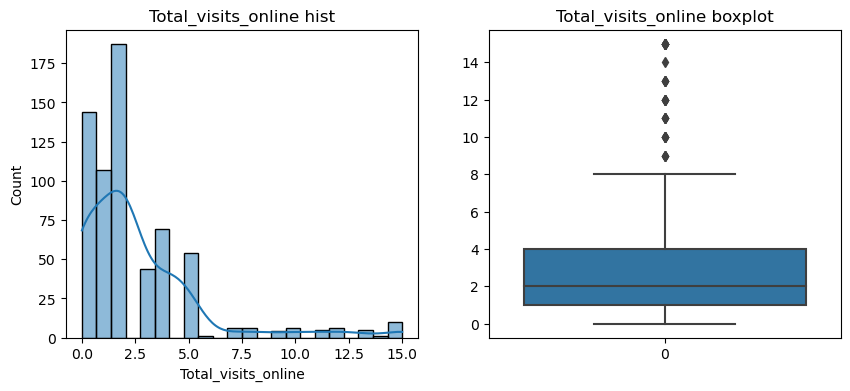

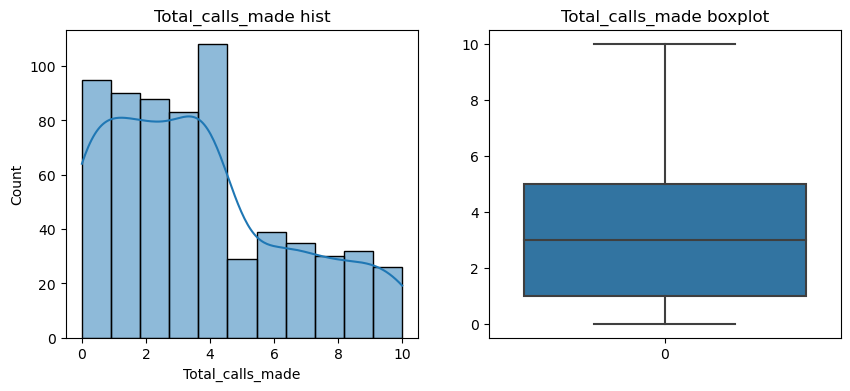

In [17]:
for col in var:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(col+" hist")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(col+" boxplot")
    
    plt.show()

In [18]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


> ## Preprocesado de datos.

#### Quitamos la columna "Customer Key"

In [19]:
data_cp = data.copy()
data_cp.drop(["Customer Key"],axis=1,inplace=True)
data_cp.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Normalización de los datos

In [20]:
data_cp_norm = (data_cp-data_cp.min())/(data_cp.max()-data_cp.min())
data_cp_norm.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


> ## Modelización.

### K means

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

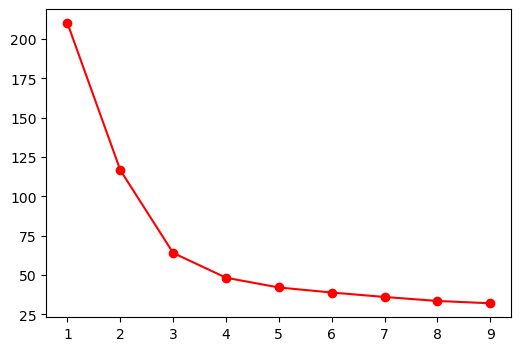

In [22]:
kmeans_per_k = [KMeans(n_clusters=k).fit(data_cp_norm) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6,4))
plt.plot(range(1,10), inertias, "ro-")
plt.show()

*Para cada k =  2  el promedio de la silueta es de:  0.4440081020026558
 - Para i =  1  la silueta del cluster vale:  0.3833586943036264
 - Para i =  2  la silueta del cluster vale:  0.5583602892061119


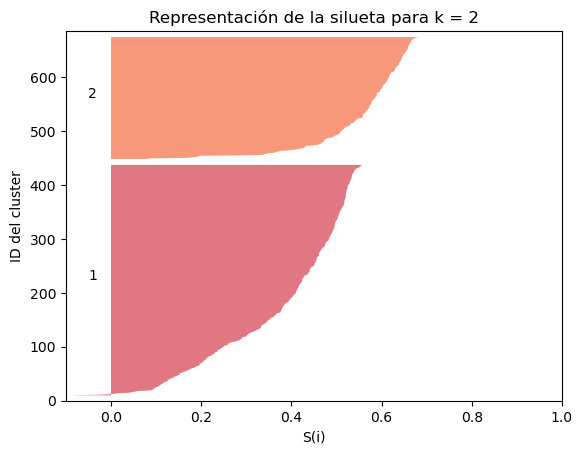

*Para cada k =  3  el promedio de la silueta es de:  0.5256970040964365
 - Para i =  1  la silueta del cluster vale:  0.5034086053846962
 - Para i =  2  la silueta del cluster vale:  0.6198370333817322
 - Para i =  3  la silueta del cluster vale:  0.5429370862039634


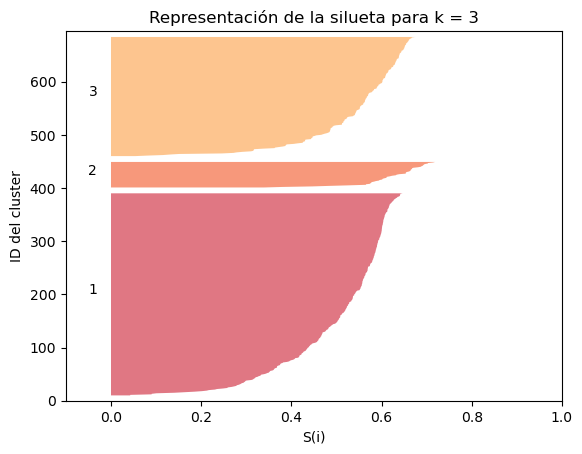

*Para cada k =  4  el promedio de la silueta es de:  0.40082692583911855
 - Para i =  1  la silueta del cluster vale:  0.34744636876644547
 - Para i =  2  la silueta del cluster vale:  0.48317218442069054
 - Para i =  3  la silueta del cluster vale:  0.583365596223473
 - Para i =  4  la silueta del cluster vale:  0.3146775529962557


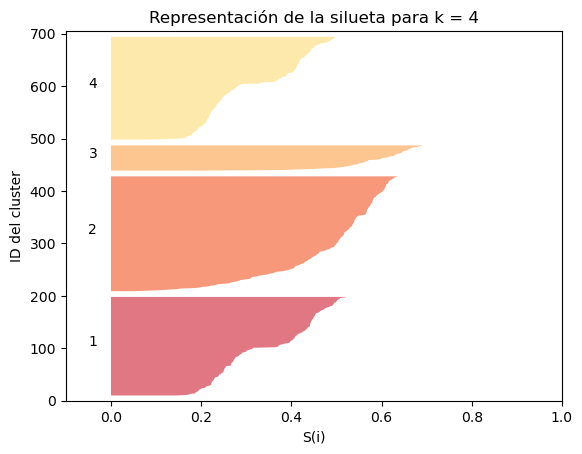

*Para cada k =  5  el promedio de la silueta es de:  0.32761217092999523
 - Para i =  1  la silueta del cluster vale:  0.3095926041096911
 - Para i =  2  la silueta del cluster vale:  0.5811183882141984
 - Para i =  3  la silueta del cluster vale:  0.27930155606875745
 - Para i =  4  la silueta del cluster vale:  0.2747102874796563
 - Para i =  5  la silueta del cluster vale:  0.34045160943221403


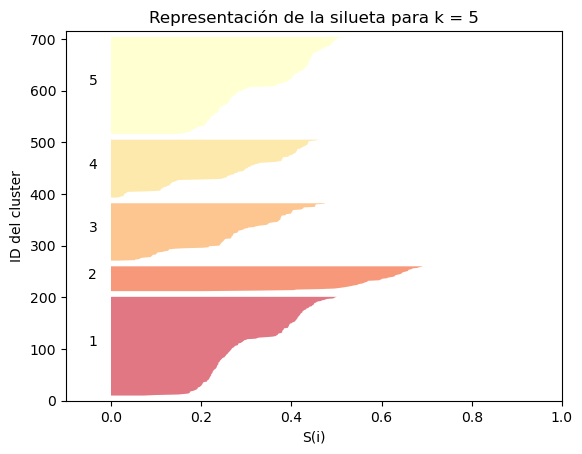

*Para cada k =  6  el promedio de la silueta es de:  0.29121270237084407
 - Para i =  1  la silueta del cluster vale:  0.2705321621280461
 - Para i =  2  la silueta del cluster vale:  0.29615705738629566
 - Para i =  3  la silueta del cluster vale:  0.22732503837466003
 - Para i =  4  la silueta del cluster vale:  0.5775709155681853
 - Para i =  5  la silueta del cluster vale:  0.23691024945408656
 - Para i =  6  la silueta del cluster vale:  0.280014614787621


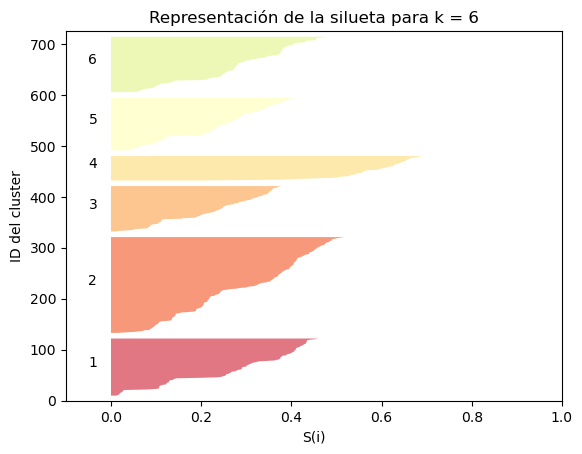

*Para cada k =  7  el promedio de la silueta es de:  0.26687771611331307
 - Para i =  1  la silueta del cluster vale:  0.2456601459691032
 - Para i =  2  la silueta del cluster vale:  0.280014614787621
 - Para i =  3  la silueta del cluster vale:  0.5775709155681853
 - Para i =  4  la silueta del cluster vale:  0.20403463633647856
 - Para i =  5  la silueta del cluster vale:  0.2705321621280461
 - Para i =  6  la silueta del cluster vale:  0.2295080260948984
 - Para i =  7  la silueta del cluster vale:  0.21476822202849985


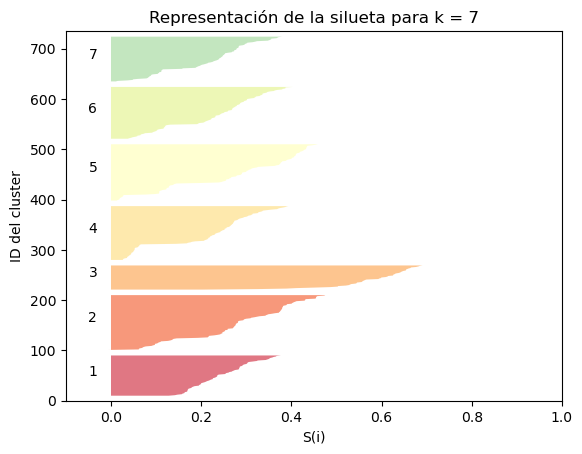

*Para cada k =  8  el promedio de la silueta es de:  0.263863348192488
 - Para i =  1  la silueta del cluster vale:  0.22315410577863826
 - Para i =  2  la silueta del cluster vale:  0.23116131159425776
 - Para i =  3  la silueta del cluster vale:  0.5762987716598609
 - Para i =  4  la silueta del cluster vale:  0.20462119048155364
 - Para i =  5  la silueta del cluster vale:  0.2885565795298916
 - Para i =  6  la silueta del cluster vale:  0.2165082103508009
 - Para i =  7  la silueta del cluster vale:  0.2456601459691032
 - Para i =  8  la silueta del cluster vale:  0.28398591448612587


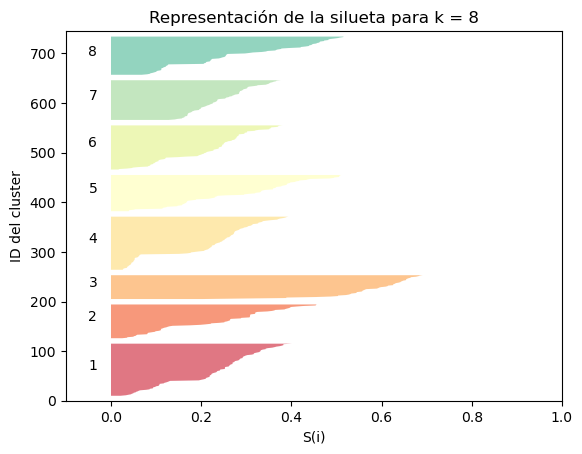

*Para cada k =  9  el promedio de la silueta es de:  0.2553195779780345
 - Para i =  1  la silueta del cluster vale:  0.21550711029449005
 - Para i =  2  la silueta del cluster vale:  0.2990879795186954
 - Para i =  3  la silueta del cluster vale:  0.5764392409463207
 - Para i =  4  la silueta del cluster vale:  0.23329475302672434
 - Para i =  5  la silueta del cluster vale:  0.20195595465852492
 - Para i =  6  la silueta del cluster vale:  0.21032764882548247
 - Para i =  7  la silueta del cluster vale:  0.2463616221696792
 - Para i =  8  la silueta del cluster vale:  0.2506716403368328
 - Para i =  9  la silueta del cluster vale:  0.18922165609354033


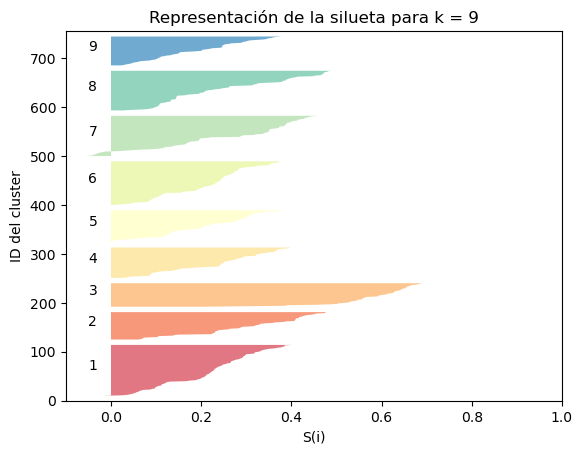

In [23]:
color_palette = [plt.cm.Spectral(float(i)/10) for i in range(1,10)]

for k in range(1,10):
    kmeanmodel = KMeans(n_clusters=k).fit(data_cp_norm)
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    labels = kmeanmodel.labels_
    
    if 1<k<len(data_cp_norm):
        _,axis1 = plt.subplots(1,1)
        
        axis1.set_xlim([-0.1,1.0])
        axis1.set_ylim([0, len(data_cp_norm)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(data_cp_norm,labels)
        print("*Para cada k = ",k," el promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(data_cp_norm,labels)
        
        y_lower = 10
        for i in range(k):
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print(" - Para i = ",i+1,
                 " la silueta del cluster vale: ",
                 np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0 ,ith_cluster_sv,
                                facecolor=color, alpha=0.7)
            
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            y_lower = y_upper + 10
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        plt.show()

#### Por el método del codo y del coeficiente de la silueta considero que el número de la cantidad de clusters optimas es 3.

In [24]:
kmean = KMeans(n_clusters=3).fit_predict(data_cp_norm)

In [25]:
clust_k = pd.Series(kmean)

In [36]:
data_clust_k = data_cp.copy()

In [37]:
len(data_clust_k), len(clust_k)

(655, 655)

In [38]:
data_clust_k["clust_k"] = clust_k
data_clust_k.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_k
0,100000,2,1,1,0,2.0
1,50000,3,0,10,9,1.0
2,50000,7,1,3,4,2.0
3,30000,5,1,1,4,1.0
4,100000,6,0,12,3,0.0


In [39]:
data_clust_k = pd.concat([data_clust_k, data["Customer Key"]],
                         axis=1)
data_clust_k.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_k,Customer Key
0,100000,2,1,1,0,2.0,87073
1,50000,3,0,10,9,1.0,38414
2,50000,7,1,3,4,2.0,17341
3,30000,5,1,1,4,1.0,40496
4,100000,6,0,12,3,0.0,47437


In [29]:
data_clust_k["clust_k"].unique()

array([ 2.,  1.,  0., nan])

In [40]:
data_clust_k[data_clust_k["clust_k"].isnull()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_k,Customer Key
655,99000,10,1,10,0,NaN,51108
656,84000,10,1,13,2,NaN,60732
657,145000,8,1,9,1,NaN,53834
658,172000,10,1,15,0,NaN,80655
659,167000,9,0,12,2,NaN,80150


In [31]:
data_clust_k.groupby("clust_k").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer Key
clust_k,,,,,,
0.0,132666.666667,8.437500,0.791667,10.083333,1.083333,53516.729167
1.0,12253.333333,2.422222,0.933333,3.542222,6.857778,55174.302222
2.0,33519.893899,5.506631,3.503979,0.973475,2.013263,55049.320955


In [32]:
for nom, df in data_clust_k.groupby("clust_k"):
    print(nom)
    print()
    print(df)

0.0

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
4              100000                   6                  0   
6              100000                   5                  0   
608             47000                   4                  4   
609             38000                   4                  3   
610             39000                   7                  2   
611             46000                   7                  4   
612            157000                   9                  1   
613             94000                   9                  1   
614            163000                   8                  1   
615            131000                   9                  1   
616             96000                  10                  1   
617            136000                   8                  0   
618            121000                   7                  0   
619            158000                   7                  0   
620            108000              

In [33]:
data_clust_k.value_counts("clust_k")

clust_k
2.0    377
1.0    225
0.0     48
dtype: int64

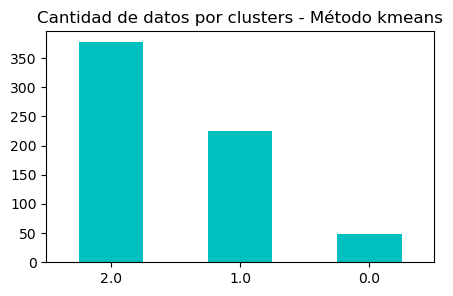

In [56]:
plt.figure(figsize=(5,3))
data_clust_k["clust_k"].value_counts().plot(kind="bar", color="c")
plt.xticks(rotation=0)
plt.title("Cantidad de datos por clusters - Método kmeans")
plt.show()

### Clustering jerárquico

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
data_clust_h = data_cp.copy()

In [46]:
Z = linkage(data_cp_norm,"ward")

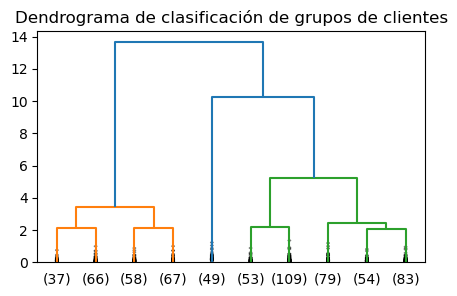

In [47]:
plt.figure(figsize=(5,3))
plt.title("Dendrograma de clasificación de grupos de clientes")
dendrogram(Z, leaf_font_size=10, truncate_mode="lastp",
           p=10, show_leaf_counts=True, show_contracted=True)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
hierarchy = AgglomerativeClustering(n_clusters=3,
                                   linkage="ward").fit_predict(data_cp_norm)

In [49]:
clust_h = pd.Series(hierarchy)

In [50]:
data_clust_h["clust_h"] = clust_h

In [51]:
data_clust_h.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_h
0,100000,2,1,1,0,0.0
1,50000,3,0,10,9,1.0
2,50000,7,1,3,4,0.0
3,30000,5,1,1,4,1.0
4,100000,6,0,12,3,2.0


In [52]:
data_clust_h = pd.concat([data_clust_h, data["Customer Key"]],
                         axis=1)
data_clust_h.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_h,Customer Key
0,100000,2,1,1,0,0.0,87073
1,50000,3,0,10,9,1.0,38414
2,50000,7,1,3,4,0.0,17341
3,30000,5,1,1,4,1.0,40496
4,100000,6,0,12,3,2.0,47437


In [53]:
data_clust_h["clust_h"].unique()

array([ 0.,  1.,  2., nan])

In [54]:
data_clust_h[data_clust_h["clust_h"].isnull()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clust_h,Customer Key
655,99000,10,1,10,0,NaN,51108
656,84000,10,1,13,2,NaN,60732
657,145000,8,1,9,1,NaN,53834
658,172000,10,1,15,0,NaN,80655
659,167000,9,0,12,2,NaN,80150


In [55]:
data_clust_h.groupby("clust_h").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer Key
clust_h,,,,,,
0.0,33705.882353,5.513369,3.502674,0.973262,2.005348,55062.066845
1.0,12228.070175,2.451754,0.969298,3.508772,6.807018,55151.750000
2.0,132666.666667,8.437500,0.791667,10.083333,1.083333,53516.729167


In [57]:
for nom, df in data_clust_h.groupby("clust_h"):
    print(nom)
    print()
    print(df)

0.0

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
2               50000                   7                  1   
228             10000                   7                  2   
229              8000                   7                  2   
230             17000                   4                  5   
..                ...                 ...                ...   
603             60000                   6                  3   
604             27000                   7                  3   
605             36000                   5                  2   
606             63000                   5                  3   
607             34000                   6                  3   

     Total_visits_online  Total_calls_made  clust_h  Customer Key  
0                      1                 0      0.0         87073  
2                      3                 4      0.0         17341  
228                   

In [58]:
data_clust_h["clust_h"].value_counts()

0.0    374
1.0    228
2.0     48
Name: clust_h, dtype: int64

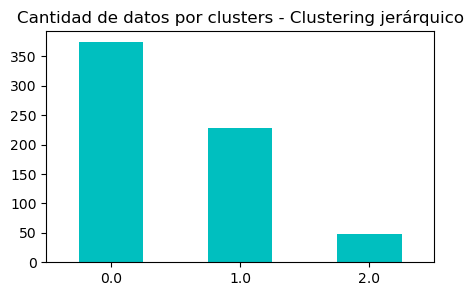

In [60]:
plt.figure(figsize=(5,3))
data_clust_h["clust_h"].value_counts().plot(kind="bar", color="c")
plt.xticks(rotation=0)
plt.title("Cantidad de datos por clusters - Clustering jerárquico")
plt.show()